In [2]:
import cv2                 #for image processing
import easygui             #to open the filebox
import numpy as np         #to store image
import imageio             #to read image stored at particular path
import sys                 
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image


In [8]:
def upload():
    ImagePath = easygui.fileopenbox()    # for selecting the image from the device
    cartoonify(ImagePath)               

In [9]:
top=tk.Tk()
top.geometry('600x600')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

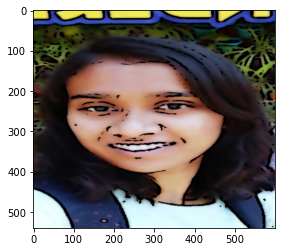

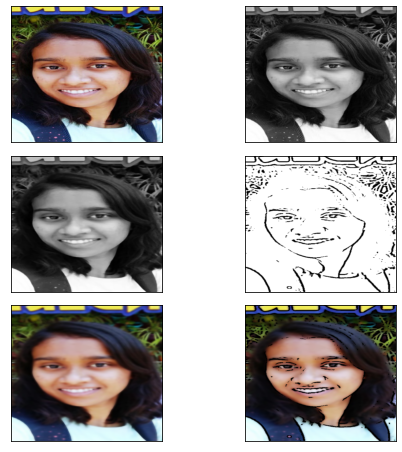

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-10-28de53cd7bee>", line 44, in <lambda>
    save1=Button(top,text="Save cartoon image",command=lambda: save(ImagePath, resized6),padx=30,pady=5)
  File "<ipython-input-10-28de53cd7bee>", line 53, in save
    path1 = os.path.dirname(ImagePath)
  File "C:\ProgramData\Anaconda3\lib\ntpath.py", line 223, in dirname
    return split(p)[0]
  File "C:\ProgramData\Anaconda3\lib\ntpath.py", line 185, in split
    p = os.fspath(p)
TypeError: expected str, bytes or os.PathLike object, not numpy.ndarray


In [10]:
def cartoonify(ImagePath):
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)      # converting the image BGR to RGB
    if originalmage is None:
        print("Cannot find the image, Choose appropriate file")
        sys.exit()
    resized1 = cv2.resize(originalmage, (600, 540)) 
    plt.imshow(resized1, cmap='gray')
    
    grayScale = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY) #converting color from BGR to RGB
    resized2 = cv2.resize(grayScale, (600, 540))
    plt.imshow(resized2, cmap='gray')
    
    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScale, 5) 
    #the center pixel is assigned a mean value of all the pixels which fall under the kernel which in turn creates blur effect
    resized3 = cv2.resize(smoothGrayScale, (600, 540))
    plt.imshow(resized3, cmap='gray')
    
    #retrieving the edges for cartoon effect by using thresholding technique
    edge = cv2.adaptiveThreshold(smoothGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

    resized4 = cv2.resize(edge, (600, 540))
    plt.imshow(resized4, cmap='gray')
    
    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    resized5 = cv2.resize(colorImage, (600, 540))
    plt.imshow(resized5, cmap='gray')
    
    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=edge)

    resized6 = cv2.resize(cartoonImage, (600, 540))
    plt.imshow(resized6, cmap='gray')
    
    # Plotting the whole transition
    images=[resized1, resized2, resized3, resized4, resized5, resized6]
    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        
    save1=Button(top,text="Save cartoon image",command=lambda: save(ImagePath, resized6),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()
    
def save(resized6, ImagePath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(resized6, cv2.COLOR_RGB2BGR))
    I = "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)
    
upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)


    



top.mainloop()
    

NameError: name 'upload' is not defined

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-26-ebecfc9b4dce>", line 1, in <lambda>
    save1=Button(top,text="Save cartoon image",command=lambda: save(ImagePath, resized6),padx=30,pady=5)
NameError: name 'ImagePath' is not defined
